
### Transforming Non-Normal Distribution

* If your data is naturally normally distributed, additional samples can further enhance its normality, making data transformation unnecessary.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import session_info

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)




In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head(1)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


In [3]:
cdf = df[['CO2EMISSIONS','ENGINESIZE']]

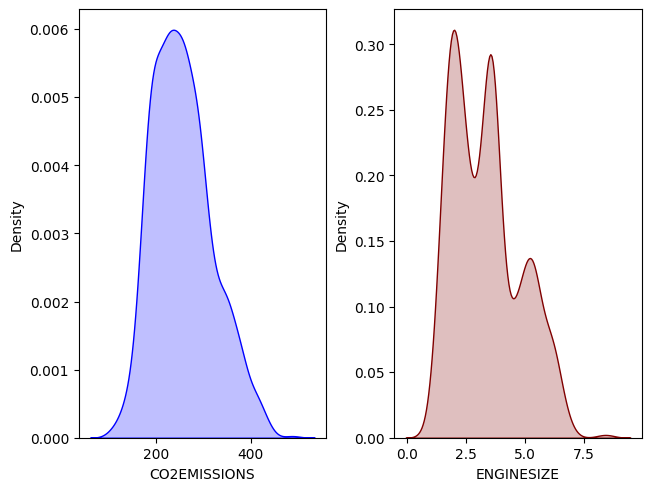

In [4]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    """
)
sns.kdeplot(data=cdf, x='ENGINESIZE', fill=True, color='maroon', ax=axd['B'])
sns.kdeplot(data=cdf, x='CO2EMISSIONS', fill=True, color='blue', ax=axd['A'])
plt.show()

Box-Cox Transformation

In [5]:
cdf['ENGINESIZE_2'], _ = stats.boxcox(cdf['ENGINESIZE'])

C:\Users\samng\AppData\Local\Temp\ipykernel_8932\2301619496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['ENGINESIZE_2'], _ = stats.boxcox(cdf['ENGINESIZE'])


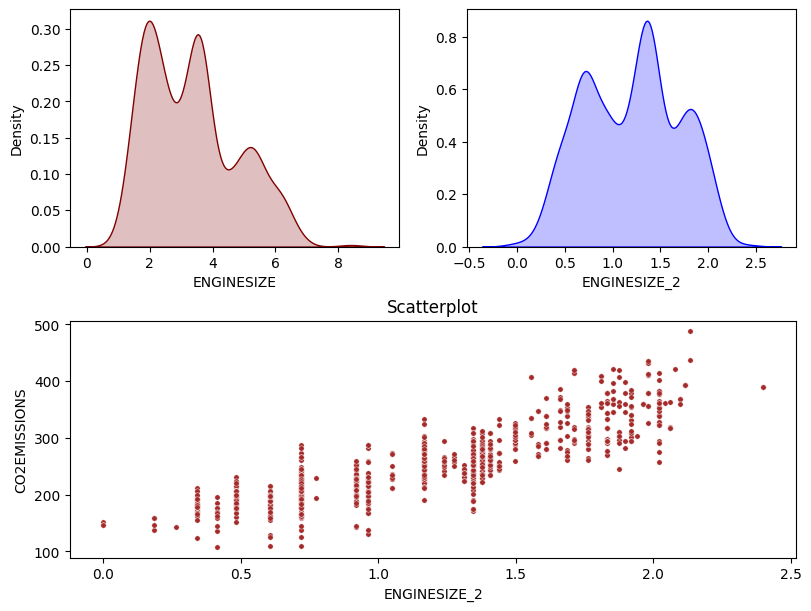

In [6]:
axd = plt.figure(constrained_layout=True, figsize=(8,6)).subplot_mosaic(
    """
    AB
    CC
    """
)
sns.kdeplot(data=cdf, x='ENGINESIZE', fill=True, color='maroon', ax=axd['A'])
sns.kdeplot(data=cdf, x='ENGINESIZE_2', fill=True, color='blue', ax=axd['B'])
sns.scatterplot(x=cdf['ENGINESIZE_2'], y=cdf['CO2EMISSIONS'], s=15, color='brown', ax=axd['C'])
axd['C'].set_title('Scatterplot')

plt.show()

In [7]:
# Find optimal lambda
_, optimal_lambda = stats.boxcox(cdf['ENGINESIZE'])
print(f'Optimal Lambda: {optimal_lambda}')

Optimal Lambda: 0.11069275775983163


#### Regression

In [8]:
# Split train and test dataset
X = cdf[['ENGINESIZE_2']] 
y = cdf['CO2EMISSIONS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
regressor = LinearRegression(positive=True) 
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared/coefficient of determination: {:.2f}'.format(regressor.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared/coefficient of determination: 75.03
Mean Absolute Error: 26.81505457572153
Mean Square Error: 1210.3287590125221
Root Mean Square Error: 34.78977951945833


[Box-cox transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

#### Predict

In [9]:
value = 6.9
transformed_value = ((value ** optimal_lambda) - 1) / optimal_lambda
transformed_value = np.array([[transformed_value]])
print(regressor.predict(transformed_value))

[364.99828313]


c:\Users\samng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
session_info.show()